In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

%load_ext autoreload
%autoreload 2
from models import LM

# Read in data
data = pd.read_csv("../../Data/csvs/full_data.csv")
data.head()

c:\Users\omara\.conda\envs\ml451\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,lat,lon,pvo,irradiance,elevation,cvh,sd,msl,tcc,t2m,u100,v100,sf,tp
0,25.01,-80.86,4.806000,229.686570,-0.100000,0.0,0.0,101686.95,0.475711,298.03910,-2.719398,-0.084908,0.0,0.002281
1,25.01,-80.38,4.742417,227.823326,-5.324144,0.0,0.0,101687.93,0.483685,298.14987,-2.745007,-0.021706,0.0,0.002306
2,25.01,-80.46,4.754083,225.595268,-5.826279,0.0,0.0,101687.93,0.483685,298.14987,-2.745007,-0.021706,0.0,0.002306
3,25.01,-80.50,4.768333,229.447935,-1.299589,0.0,0.0,101687.93,0.483685,298.14987,-2.745007,-0.021706,0.0,0.002306
4,25.01,-80.58,4.764667,226.067122,-0.945366,0.0,0.0,101687.93,0.483685,298.14987,-2.745007,-0.021706,0.0,0.002306


In [11]:
# Prepare data
data_no_irr  = data #.drop('irradiance', axis = 1)
y = data_no_irr['pvo']
X = data_no_irr.drop('pvo', axis = 1)
for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Convert to tensors
X_train = torch.tensor(X_train.values, dtype = torch.float32)
y_train = torch.tensor(y_train.values, dtype = torch.float32)
X_test = torch.tensor(X_test.values, dtype = torch.float32)
y_test = torch.tensor(y_test.values, dtype = torch.float32)

# Loss Plots

0.007139960769563913


Text(0.5, 1.0, 'No Irradiance ReLU')

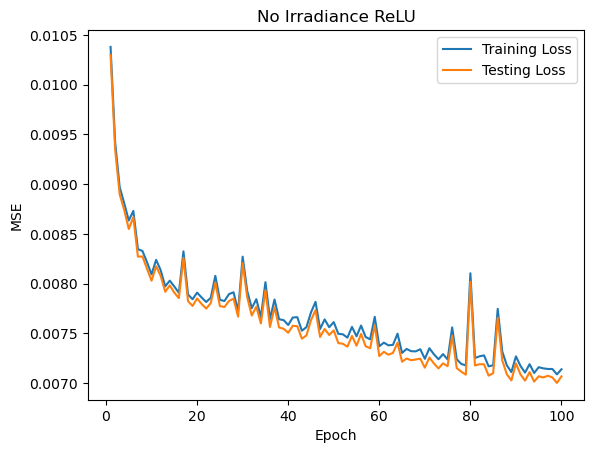

In [2]:
x = np.linspace(1,100, 100, dtype = 'int')
losses0 = np.loadtxt('../../Data/csvs/model/loss_no_irr_relu.txt')
plt.plot(x, losses0[:,0], label = 'Training Loss')
plt.plot(x, losses0[:,1], label = 'Testing Loss')
print(losses0[:,0][-1])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.title('No Irradiance ReLU')

0.007897651754319668


Text(0.5, 1.0, 'No Irradiance Sigmoid')

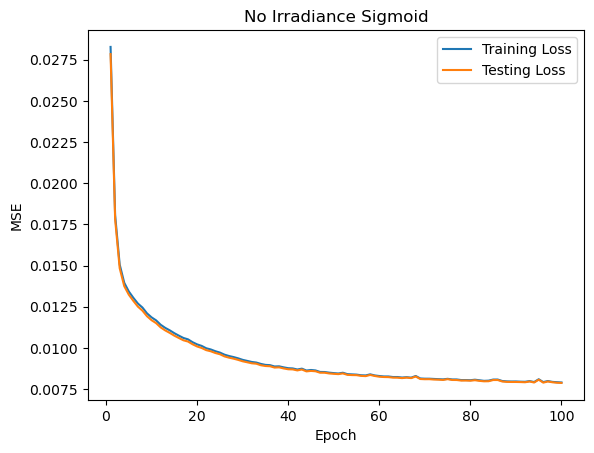

In [3]:
x = np.linspace(1,100, 100, dtype = 'int')
losses1 = np.loadtxt('../../Data/csvs/model/loss_no_irr_sig.txt')
plt.plot(x, losses1[:,0], label = 'Training Loss')
plt.plot(x, losses1[:,1], label = 'Testing Loss')
print(losses1[:,0][-1])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.title('No Irradiance Sigmoid')

0.005824079737067223


Text(0.5, 1.0, 'Irradiance ReLU')

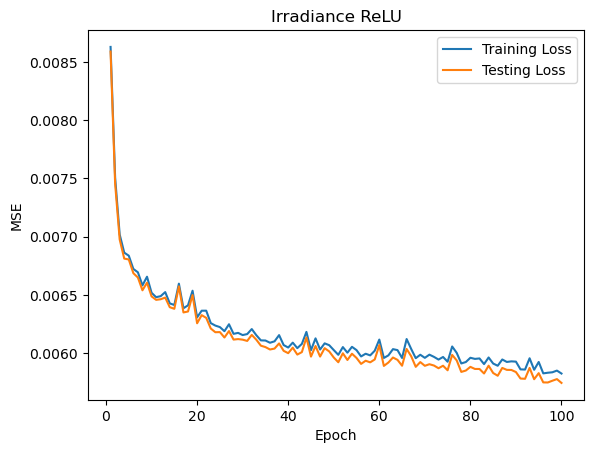

In [23]:
x = np.linspace(1,100, 100, dtype = 'int')
losses2 = np.loadtxt('../../Data/csvs/model/loss_irr_relu_v2.txt')
plt.plot(x, losses2[:,0], label = 'Training Loss')
plt.plot(x, losses2[:,1], label = 'Testing Loss')
print(losses2[:,0][-1])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.title('Irradiance ReLU')

0.006518680136650801


Text(0.5, 1.0, 'Irradiance Sigmoid')

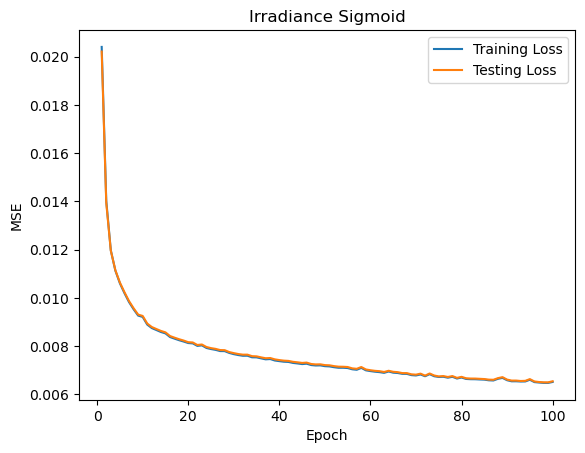

In [5]:
x = np.linspace(1,100, 100, dtype = 'int')
losses3 = np.loadtxt('../../Data/csvs/model/loss_irr_sig.txt')
plt.plot(x, losses3[:,0], label = 'Training Loss')
plt.plot(x, losses3[:,1], label = 'Testing Loss')
print(losses3[:,0][-1])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.title('Irradiance Sigmoid')

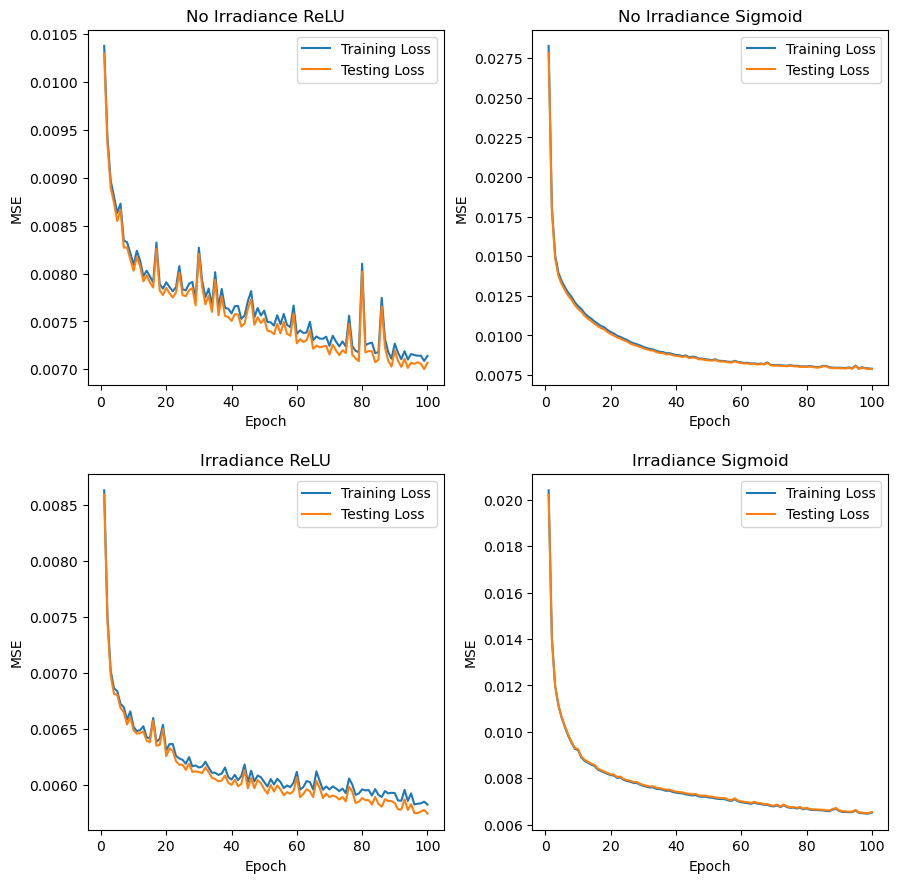

In [24]:
loss = [losses0, losses1, losses2, losses3]
titles = ['No Irradiance ReLU', 'No Irradiance Sigmoid', 'Irradiance ReLU', 'Irradiance Sigmoid']
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.25, wspace=0.25)
x = np.linspace(1,100, 100, dtype = 'int')
for i,l in enumerate(loss):
    fig.add_subplot(2,2,i + 1)
    plt.plot(x, l[:,0], label = 'Training Loss')
    plt.plot(x, l[:,1], label = 'Testing Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title(titles[i])
    plt.legend()

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [17]:
LR = LinearRegression()
LR.fit(X_train, y_train)
preds = LR.predict(X_test)
print(np.mean((preds - y_test.numpy())**2))

0.010375996


In [19]:
degree = 3
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(np.mean((preds - y_test.numpy())**2))

0.004966058311637374
